## Invers to the power of the distance
This notebook is to prototype an estimator, starting with something simple as IDp. The objective here is to define a search strategy.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from search2 import Neighborhood
from estimator import Estimator
%matplotlib inline

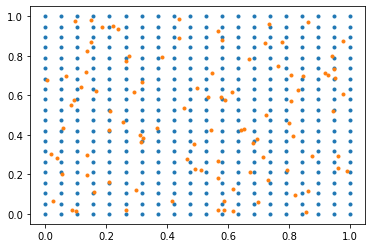

In [2]:
# generate some fake data 
np.random.seed(0)
x = np.random.rand(100, 3) # a 3D dataset
x[:,2]=0 # make it 2D

# generate target (a grid)
nx, ny, nz = (20, 20, 1)
xt = np.linspace(0, 1, nx)
yt = np.linspace(0, 1, ny)
zt = np.linspace(0, 0, nz)
x0, y0, z0 = np.meshgrid(xt, yt, zt)

plt.plot(x0.ravel(),y0.ravel(),'.')
plt.plot(x[:,0],x[:,1],'.')


In [3]:
n = Neighborhood(x[:,0],x[:,1],x[:,2], a = [[0.3,0.1,0.1],[0.3,0.3,0.3]], rot=[[45,0,0],[-45,0,0]])

In [4]:
e =Estimator(x0.ravel(), y0.ravel(), z0.ravel(), search = n)

In [5]:
e.count(debug = True)

In [6]:
e.estimates['e1']['estimate'][1:10]

array([[3, array([ 5, 68, 87])],
       [3, array([ 5, 68, 87])],
       [6, array([ 5, 20, 57, 68, 71, 87])],
       [5, array([ 5, 20, 57, 71, 87])],
       [5, array([18, 20, 21, 57, 71])],
       [5, array([18, 20, 21, 26, 71])],
       [4, array([18, 26, 27, 71])],
       [3, array([18, 26, 27])],
       [4, array([11, 26, 27, 32])]], dtype=object)

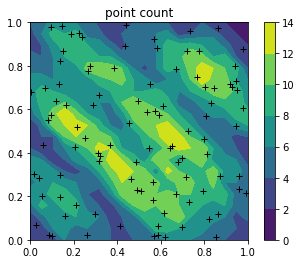

In [7]:
#plt.scatter(e.x0,e.y0, s = 0.6,c=e.estimates['e1']['estimate'][:,0])
plt.contourf(xt,yt,e.estimates['e1']['estimate'][:,0].reshape([nx,ny]))
plt.plot(n.x,n.y,'+k')
plt.axis('equal');
plt.axis('scaled');
plt.colorbar()
plt.title('point count');